In [10]:
from utils import *
from config import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [3]:
# Import dict list of pkl 
dict_combined_datasets_metadata = load_from_pickle("./dataset/dict_datasets.pkl", False)

In [20]:
# Add column names
columns = ['Dataset_index','Name', 'Train_Accuracy', 'Train_Precision', 'Test_Accuracy', 'Test_Precision']

# Create DataFrame
result_df = pd.DataFrame(columns=columns)
result_df

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision


In [21]:
# Load the datasets into separate df
index = 0

for k, v in dict_combined_datasets_metadata.items():
    exec(f'dataset_{index} = load_from_pickle(f\"./dataset/{v}\", False)')
    df = pd.DataFrame([[index, k]], columns=['Dataset_index', 'Name'])
    result_df = pd.concat([result_df, df], ignore_index=True)
    index += 1


In [22]:
result_df

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
0,0,noncir_cir,NaN,NaN,NaN,NaN
1,1,noncir_cir_mm_scaled,NaN,NaN,NaN,NaN
2,2,noncir_cir_ss_scaled,NaN,NaN,NaN,NaN
3,3,noncir_cir_stats,NaN,NaN,NaN,NaN
4,4,noncir_cir_stats_mm_scaled,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
67,67,noncir_ss_scaled_trimmed_cir_stats_mm_scaled_t...,NaN,NaN,NaN,NaN
68,68,noncir_ss_scaled_trimmed_cir_stats_ss_scaled_t...,NaN,NaN,NaN,NaN
69,69,noncir_ss_scaled_trimmed_cir_pca,NaN,NaN,NaN,NaN
70,70,noncir_ss_scaled_trimmed_cir_pca_mm_scaled,NaN,NaN,NaN,NaN


In [6]:
# Select the features to be used for Support Vector Classification
# Define features and target variable
X = dataset_0.drop('NLOS', axis=1)
y = dataset_0['NLOS']

# Split data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.8742857142857143
Precision: 0.8777793024030317
Recall: 0.8749215160562853
F1 Score: 0.8741090546209667
Mean Squared Error (MSE): 0.12571428571428572
Matthews Correlation Coefficient (MCC): 0.7526953933474829
Cohen's Kappa: 0.7488588772719398
Hamming Loss: 0.12571428571428572

Confusion Matrix:
 [[5744  474]
 [1110 5272]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6218
         1.0       0.92      0.83      0.87      6382

    accuracy                           0.87     12600
   macro avg       0.88      0.87      0.87     12600
weighted avg       0.88      0.87      0.87     12600





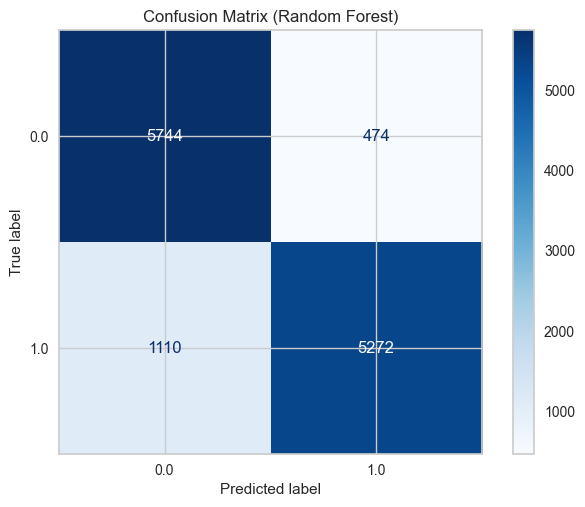

In [12]:
""" Random Forest Model Performance """

# Testing Accuracy
y_test_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_test_pred, print_results=True)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=results["cm"], display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14782
         1.0       1.00      1.00      1.00     14618

    accuracy                           1.00     29400
   macro avg       1.00      1.00      1.00     29400
weighted avg       1.00      1.00      1.00     29400





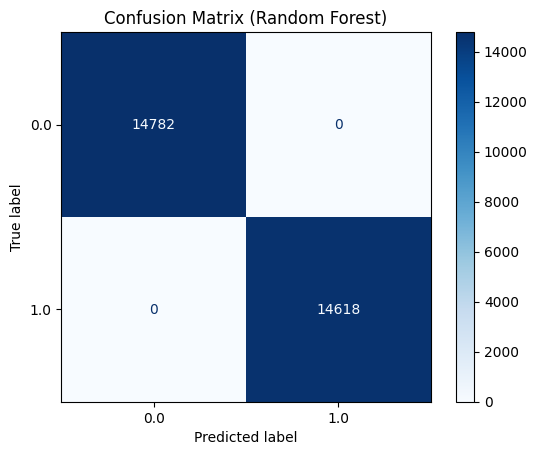

In [8]:
""" Random Forest Model Performance """

# Training Accuracy
y_train_pred = rf_classifier.predict(X_train)
results = classifier_metrics(list(y_train), y_train_pred, print_results=True)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=results["cm"], display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [29]:
# Select the first 10 dataset to be used for Random Forest

for index in range(0, 10):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_0: noncir_cir...
Accuracy: 0.8749206349206349
Precision: 0.8779675361851847
Recall: 0.8755152170400448
F1 Score: 0.874773429809554
Mean Squared Error (MSE): 0.12507936507936507
Matthews Correlation Coefficient (MCC): 0.7534787625001003
Cohen's Kappa: 0.7501066390873204
Hamming Loss: 0.12507936507936507

Confusion Matrix:
 [[5728  490]
 [1086 5296]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6218
         1.0       0.92      0.83      0.87      6382

    accuracy                           0.87     12600
   macro avg       0.88      0.88      0.87     12600
weighted avg       0.88      0.87      0.87     12600



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
               precision    recall 

In [35]:
result_df

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
0,0,noncir_cir,1.000000,1.000000,0.874921,0.877968
1,1,noncir_cir_mm_scaled,1.000000,1.000000,0.874048,0.877321
2,2,noncir_cir_ss_scaled,1.000000,1.000000,0.872778,0.876202
3,3,noncir_cir_stats,1.000000,1.000000,0.917063,0.917468
4,4,noncir_cir_stats_mm_scaled,0.999966,0.999966,0.915079,0.915462
...,...,...,...,...,...,...
67,67,noncir_ss_scaled_trimmed_cir_stats_mm_scaled_t...,NaN,NaN,NaN,NaN
68,68,noncir_ss_scaled_trimmed_cir_stats_ss_scaled_t...,NaN,NaN,NaN,NaN
69,69,noncir_ss_scaled_trimmed_cir_pca,NaN,NaN,NaN,NaN
70,70,noncir_ss_scaled_trimmed_cir_pca_mm_scaled,NaN,NaN,NaN,NaN


In [36]:
# Select the second 10 dataset to be used for Random Forest

for index in range(10, 20):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_10: noncir_cir_pca_mm_scaled...
Accuracy: 0.9027777777777778
Precision: 0.9037788357122472
Recall: 0.9031218843928107
F1 Score: 0.9027568143863214
Mean Squared Error (MSE): 0.09722222222222222
Matthews Correlation Coefficient (MCC): 0.8069004526712231
Cohen's Kappa: 0.8056627568556665
Hamming Loss: 0.09722222222222222

Confusion Matrix:
 [[5780  438]
 [ 787 5595]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      6218
         1.0       0.93      0.88      0.90      6382

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
               prec

In [40]:
result_view = result_df.iloc[10:20]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
10,10,noncir_cir_pca_mm_scaled,1.000000,1.000000,0.902778,0.903779
11,11,noncir_cir_pca_ss_scaled,1.000000,1.000000,0.902222,0.903390
12,12,noncir_mm_scaled_cir,0.999966,0.999966,0.872381,0.875860
13,13,noncir_mm_scaled_cir_mm_scaled,0.999966,0.999966,0.873175,0.876590
14,14,noncir_mm_scaled_cir_ss_scaled,1.000000,1.000000,0.873889,0.877072
15,15,noncir_mm_scaled_cir_stats,1.000000,1.000000,0.916508,0.916866
16,16,noncir_mm_scaled_cir_stats_mm_scaled,1.000000,1.000000,0.917460,0.917904
17,17,noncir_mm_scaled_cir_stats_ss_scaled,1.000000,1.000000,0.916905,0.917267
18,18,noncir_mm_scaled_cir_stats_trimmed,1.000000,1.000000,0.916984,0.917319
19,19,noncir_mm_scaled_cir_stats_mm_scaled_trimmed,1.000000,1.000000,0.915079,0.915398


In [41]:
# Select the third 10 dataset to be used for Random Forest

for index in range(20, 30):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_20: noncir_mm_scaled_cir_stats_ss_scaled_trimmed...
Accuracy: 0.9167460317460318
Precision: 0.9171501150678665
Recall: 0.9169747225506282
F1 Score: 0.916743388154571
Mean Squared Error (MSE): 0.08325396825396826
Matthews Correlation Coefficient (MCC): 0.8341248191784878
Cohen's Kappa: 0.8335446799809765
Hamming Loss: 0.08325396825396826

Confusion Matrix:
 [[5811  407]
 [ 642 5740]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6218
         1.0       0.93      0.90      0.92      6382

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



Accuracy: 0.9999659863945578
Precision: 0.9999661773658932
Recall: 0.9999657955944725
F1 Score: 0.9999659853231876
Mean Squared Error (MSE): 3.401360544217687e-05
Matthews Correlation Coefficient (MCC): 0.999931972960293
Cohen's Kappa: 0.999

In [42]:
result_view = result_df.iloc[20:30]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
20,20,noncir_mm_scaled_cir_stats_ss_scaled_trimmed,0.999966,0.999966,0.916746,0.917150
21,21,noncir_mm_scaled_cir_pca,1.000000,1.000000,0.902302,0.903435
22,22,noncir_mm_scaled_cir_pca_mm_scaled,0.999966,0.999966,0.902619,0.903686
23,23,noncir_mm_scaled_cir_pca_ss_scaled,1.000000,1.000000,0.902540,0.903573
24,24,noncir_ss_scaled_cir,1.000000,1.000000,0.875556,0.878761
25,25,noncir_ss_scaled_cir_mm_scaled,0.999966,0.999966,0.874921,0.877775
26,26,noncir_ss_scaled_cir_ss_scaled,1.000000,1.000000,0.872857,0.875978
27,27,noncir_ss_scaled_cir_stats,1.000000,1.000000,0.917143,0.917604
28,28,noncir_ss_scaled_cir_stats_mm_scaled,1.000000,1.000000,0.916508,0.917034
29,29,noncir_ss_scaled_cir_stats_ss_scaled,1.000000,1.000000,0.916905,0.917292


In [43]:
# Select the fourth 10 dataset to be used for Random Forest

for index in range(30, 40):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_30: noncir_ss_scaled_cir_stats_trimmed...
Accuracy: 0.9162698412698412
Precision: 0.9166568203090875
Recall: 0.9164943186646184
F1 Score: 0.9162674737004878
Mean Squared Error (MSE): 0.3349206349206349
Matthews Correlation Coefficient (MCC): 0.8331511231261701
Cohen's Kappa: 0.8325912169441012
Hamming Loss: 0.08373015873015872

Confusion Matrix:
 [[5806  412]
 [ 643 5739]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.93      0.92      6218
         1.0       0.93      0.90      0.92      6382

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



Accuracy: 0.9999659863945578
Precision: 0.9999661773658932
Recall: 0.9999657955944725
F1 Score: 0.9999659853231876
Mean Squared Error (MSE): 0.00013605442176870748
Matthews Correlation Coefficient (MCC): 0.999931972960293
Cohen's Kappa: 0.999931970646

In [44]:
result_view = result_df.iloc[30:40]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
30,30,noncir_ss_scaled_cir_stats_trimmed,0.999966,0.999966,0.916270,0.916657
31,31,noncir_ss_scaled_cir_stats_mm_scaled_trimmed,1.000000,1.000000,0.917381,0.917856
32,32,noncir_ss_scaled_cir_stats_ss_scaled_trimmed,1.000000,1.000000,0.915873,0.916316
33,33,noncir_ss_scaled_cir_pca,1.000000,1.000000,0.903333,0.904355
34,34,noncir_ss_scaled_cir_pca_mm_scaled,1.000000,1.000000,0.903016,0.904077
35,35,noncir_ss_scaled_cir_pca_ss_scaled,1.000000,1.000000,0.902937,0.903776
36,36,noncir_trimmed_cir,1.000000,1.000000,0.871746,0.874750
37,37,noncir_trimmed_cir_mm_scaled,1.000000,1.000000,0.875159,0.878218
38,38,noncir_trimmed_cir_ss_scaled,1.000000,1.000000,0.873095,0.876250
39,39,noncir_trimmed_cir_stats,1.000000,1.000000,0.916111,0.916671


In [45]:
# Select the fifth 10 dataset to be used for Random Forest

for index in range(40, 50):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_40: noncir_trimmed_cir_stats_mm_scaled...
Accuracy: 0.9165079365079365
Precision: 0.9169599030877664
Recall: 0.9167479519584019
F1 Score: 0.9165044001989603
Mean Squared Error (MSE): 0.08349206349206349
Matthews Correlation Coefficient (MCC): 0.8337078281043074
Cohen's Kappa: 0.8330724323993222
Hamming Loss: 0.08349206349206349

Confusion Matrix:
 [[5815  403]
 [ 649 5733]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      6218
         1.0       0.93      0.90      0.92      6382

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
         

In [46]:
result_view = result_df.iloc[40:50]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
40,40,noncir_trimmed_cir_stats_mm_scaled,1.000000,1.000000,0.916508,0.916960
41,41,noncir_trimmed_cir_stats_ss_scaled,0.999966,0.999966,0.914683,0.915252
42,42,noncir_trimmed_cir_stats_trimmed,0.999966,0.999966,0.914127,0.914604
43,43,noncir_trimmed_cir_stats_mm_scaled_trimmed,1.000000,1.000000,0.916825,0.917287
44,44,noncir_trimmed_cir_stats_ss_scaled_trimmed,1.000000,1.000000,0.915000,0.915501
45,45,noncir_trimmed_cir_pca,1.000000,1.000000,0.905714,0.906676
46,46,noncir_trimmed_cir_pca_mm_scaled,1.000000,1.000000,0.907381,0.908192
47,47,noncir_trimmed_cir_pca_ss_scaled,1.000000,1.000000,0.903651,0.904371
48,48,noncir_mm_scaled_trimmed_cir,1.000000,1.000000,0.871825,0.874692
49,49,noncir_mm_scaled_trimmed_cir_mm_scaled,1.000000,1.000000,0.873254,0.876751


In [48]:
# Select the fifth 10 dataset to be used for Random Forest

for index in range(50, 60):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_50: noncir_mm_scaled_trimmed_cir_ss_scaled...
Accuracy: 0.8716666666666667
Precision: 0.8747460562473379
Recall: 0.8722658633324527
F1 Score: 0.8715121113403285
Mean Squared Error (MSE): 0.12833333333333333
Matthews Correlation Coefficient (MCC): 0.7470078022600489
Cohen's Kappa: 0.7436082519529701
Hamming Loss: 0.12833333333333333

Confusion Matrix:
 [[5710  508]
 [1109 5273]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6218
         1.0       0.91      0.83      0.87      6382

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.87     12600
weighted avg       0.88      0.87      0.87     12600



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
     

In [49]:
result_view = result_df.iloc[50:60]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
50,50,noncir_mm_scaled_trimmed_cir_ss_scaled,1.000000,1.000000,0.871667,0.874746
51,51,noncir_mm_scaled_trimmed_cir_stats,1.000000,1.000000,0.915317,0.915887
52,52,noncir_mm_scaled_trimmed_cir_stats_mm_scaled,1.000000,1.000000,0.915000,0.915429
53,53,noncir_mm_scaled_trimmed_cir_stats_ss_scaled,1.000000,1.000000,0.915079,0.915605
54,54,noncir_mm_scaled_trimmed_cir_stats_trimmed,1.000000,1.000000,0.915317,0.915729
55,55,noncir_mm_scaled_trimmed_cir_stats_mm_scaled_t...,1.000000,1.000000,0.916111,0.916567
56,56,noncir_mm_scaled_trimmed_cir_stats_ss_scaled_t...,1.000000,1.000000,0.916429,0.916867
57,57,noncir_mm_scaled_trimmed_cir_pca,0.999966,0.999966,0.904365,0.905183
58,58,noncir_mm_scaled_trimmed_cir_pca_mm_scaled,1.000000,1.000000,0.903889,0.904816
59,59,noncir_mm_scaled_trimmed_cir_pca_ss_scaled,1.000000,1.000000,0.905079,0.905977


In [50]:
# Select the sixth 10 dataset to be used for Random Forest

for index in range(60, 70):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_60: noncir_ss_scaled_trimmed_cir...
Accuracy: 0.8751587301587301
Precision: 0.8785316878211737
Recall: 0.875783314865436
F1 Score: 0.8749913898031769
Mean Squared Error (MSE): 0.49936507936507935
Matthews Correlation Coefficient (MCC): 0.754309995773751
Cohen's Kappa: 0.7505972513677399
Hamming Loss: 0.12484126984126984

Confusion Matrix:
 [[5744  474]
 [1099 5283]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      0.92      0.88      6218
         1.0       0.92      0.83      0.87      6382

    accuracy                           0.88     12600
   macro avg       0.88      0.88      0.87     12600
weighted avg       0.88      0.88      0.87     12600



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error (MSE): 0.0
Matthews Correlation Coefficient (MCC): 1.0
Cohen's Kappa: 1.0
Hamming Loss: 0.0

Confusion Matrix:
 [[14782     0]
 [    0 14618]]

Classification Report:
               pr

In [51]:
result_view = result_df.iloc[60:70]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
60,60,noncir_ss_scaled_trimmed_cir,1.000000,1.000000,0.875159,0.878532
61,61,noncir_ss_scaled_trimmed_cir_mm_scaled,1.000000,1.000000,0.871032,0.874020
62,62,noncir_ss_scaled_trimmed_cir_ss_scaled,1.000000,1.000000,0.873889,0.877005
63,63,noncir_ss_scaled_trimmed_cir_stats,0.999966,0.999966,0.915079,0.915513
64,64,noncir_ss_scaled_trimmed_cir_stats_mm_scaled,1.000000,1.000000,0.913651,0.914214
65,65,noncir_ss_scaled_trimmed_cir_stats_ss_scaled,0.999966,0.999966,0.915397,0.915922
66,66,noncir_ss_scaled_trimmed_cir_stats_trimmed,1.000000,1.000000,0.915556,0.915998
67,67,noncir_ss_scaled_trimmed_cir_stats_mm_scaled_t...,0.999966,0.999966,0.916746,0.917249
68,68,noncir_ss_scaled_trimmed_cir_stats_ss_scaled_t...,1.000000,1.000000,0.915794,0.916259
69,69,noncir_ss_scaled_trimmed_cir_pca,1.000000,1.000000,0.903730,0.904595


In [53]:
# Select the sixth 10 dataset to be used for Random Forest

for index in range(70, 72):
    data = globals()[f"dataset_{index}"] 
    
    name_value = result_df.loc[index, 'Name'] if index < len(result_df) else None
    print(f"Evaluating dataset_{index}: {name_value}...")

    # Define features and target variable
    X = data.drop('NLOS', axis=1)
    y = data['NLOS']

    # Split data into train and test sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    """ Random Forest Model Performance """
    y_test_pred = rf_classifier.predict(X_test)
    y_train_pred = rf_classifier.predict(X_train)

    results_test = classifier_metrics(list(y_test), y_test_pred, print_results=True)
    results_train = classifier_metrics(list(y_train), y_train_pred, print_results=True)

    # Append the performance metrics to result_df with the same index
    result_df.loc[index, 'Train_Accuracy'] = results_train["accuracy"]
    result_df.loc[index, 'Train_Precision'] = results_train['precision']
    result_df.loc[index, 'Test_Accuracy'] = results_test["accuracy"]
    result_df.loc[index, 'Test_Precision'] = results_test['precision']

    # Export model
    save_to_pickle(f'{MODEL_FOLDER}/Random_Forest/rf_{name_value}.pkl', rf_classifier, complete_path=False)


Evaluating dataset_70: noncir_ss_scaled_trimmed_cir_pca_mm_scaled...
Accuracy: 0.9058730158730158
Precision: 0.9068473072955908
Recall: 0.9062124810461717
F1 Score: 0.905853802363294
Mean Squared Error (MSE): 0.3765079365079365
Matthews Correlation Coefficient (MCC): 0.8130595405097861
Cohen's Kappa: 0.8118478775560238
Hamming Loss: 0.09412698412698413

Confusion Matrix:
 [[5797  421]
 [ 765 5617]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.88      0.93      0.91      6218
         1.0       0.93      0.88      0.90      6382

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



Accuracy: 0.9999659863945578
Precision: 0.9999661773658932
Recall: 0.9999657955944725
F1 Score: 0.9999659853231876
Mean Squared Error (MSE): 0.00013605442176870748
Matthews Correlation Coefficient (MCC): 0.999931972960293
Cohen's Kappa: 0.99993

In [54]:
result_view = result_df.iloc[70:72]
result_view

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
70,70,noncir_ss_scaled_trimmed_cir_pca_mm_scaled,0.999966,0.999966,0.905873,0.906847
71,71,noncir_ss_scaled_trimmed_cir_pca_ss_scaled,1.000000,1.000000,0.903810,0.904768


In [55]:
result_df

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
0,0,noncir_cir,1.000000,1.000000,0.874921,0.877968
1,1,noncir_cir_mm_scaled,1.000000,1.000000,0.874048,0.877321
2,2,noncir_cir_ss_scaled,1.000000,1.000000,0.872778,0.876202
3,3,noncir_cir_stats,1.000000,1.000000,0.917063,0.917468
4,4,noncir_cir_stats_mm_scaled,0.999966,0.999966,0.915079,0.915462
...,...,...,...,...,...,...
67,67,noncir_ss_scaled_trimmed_cir_stats_mm_scaled_t...,0.999966,0.999966,0.916746,0.917249
68,68,noncir_ss_scaled_trimmed_cir_stats_ss_scaled_t...,1.000000,1.000000,0.915794,0.916259
69,69,noncir_ss_scaled_trimmed_cir_pca,1.000000,1.000000,0.903730,0.904595
70,70,noncir_ss_scaled_trimmed_cir_pca_mm_scaled,0.999966,0.999966,0.905873,0.906847


In [57]:
highest_accuracy_index = result_df['Test_Accuracy'].idxmax()
row_highest_accuracy = result_df.loc[highest_accuracy_index]
row_highest_accuracy

Dataset_index                                        16
Name               noncir_mm_scaled_cir_stats_mm_scaled
Train_Accuracy                                      1.0
Train_Precision                                     1.0
Test_Accuracy                                   0.91746
Test_Precision                                 0.917904
Name: 16, dtype: object

In [59]:
highest_accuracy_rows = result_df.sort_values(by='Test_Accuracy', ascending=False).iloc[:5]
highest_accuracy_rows

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
16,16,noncir_mm_scaled_cir_stats_mm_scaled,1.0,1.0,0.917460,0.917904
31,31,noncir_ss_scaled_cir_stats_mm_scaled_trimmed,1.0,1.0,0.917381,0.917856
27,27,noncir_ss_scaled_cir_stats,1.0,1.0,0.917143,0.917604
3,3,noncir_cir_stats,1.0,1.0,0.917063,0.917468
18,18,noncir_mm_scaled_cir_stats_trimmed,1.0,1.0,0.916984,0.917319


In [60]:
result_df_filtered = result_df[~result_df['Train_Accuracy'].astype(str).str.split('.').str[0].str.startswith('1')]
result_df_filtered

,Dataset_index,Name,Train_Accuracy,Train_Precision,Test_Accuracy,Test_Precision
4,4,noncir_cir_stats_mm_scaled,0.999966,0.999966,0.915079,0.915462
7,7,noncir_cir_stats_mm_scaled_trimmed,0.999932,0.999932,0.916905,0.917309
12,12,noncir_mm_scaled_cir,0.999966,0.999966,0.872381,0.875860
13,13,noncir_mm_scaled_cir_mm_scaled,0.999966,0.999966,0.873175,0.876590
20,20,noncir_mm_scaled_cir_stats_ss_scaled_trimmed,0.999966,0.999966,0.916746,0.917150
22,22,noncir_mm_scaled_cir_pca_mm_scaled,0.999966,0.999966,0.902619,0.903686
25,25,noncir_ss_scaled_cir_mm_scaled,0.999966,0.999966,0.874921,0.877775
30,30,noncir_ss_scaled_cir_stats_trimmed,0.999966,0.999966,0.916270,0.916657
41,41,noncir_trimmed_cir_stats_ss_scaled,0.999966,0.999966,0.914683,0.915252
42,42,noncir_trimmed_cir_stats_trimmed,0.999966,0.999966,0.914127,0.914604


In [61]:
num_rows_train_accuracy_1 = len(result_df[result_df['Train_Accuracy'].astype(str).str.startswith('1')])
print("Number of rows where train accuracy starts with 1:", num_rows_train_accuracy_1)


Number of rows where train accuracy starts with 1: 57


In [64]:
print(72-57)

15


In [63]:
print(len(result_df_filtered))

15
